<img src="pics/otus.png">

In [68]:
import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools #izip
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import table
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]


# Линейная регрессия

## Задачи машинного обучения
* Обучение с учителем
    * Регрессия
    * Классификация
* Обучение без учителя
    * Кластеризация
    * Снижение размерности
* Обучение с подкреплением

**Обучение с учителем** - есть некоторое количество примеров, для которых известны ответы.
* ответы числа - регрессия
* ответы классы - классификация

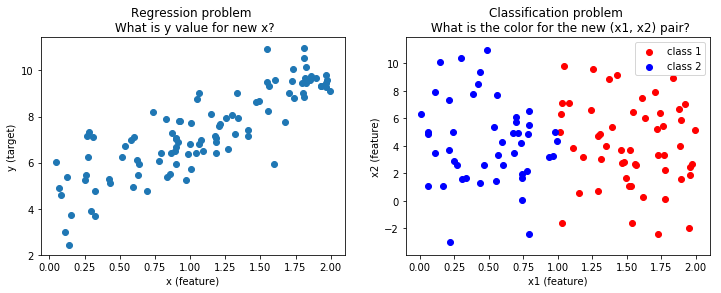

In [69]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(x, y)
ax[0].set_title("Regression problem \n What is y value for new x?")
ax[0].set_xlabel("x (feature)")
ax[0].set_ylabel("y (target)")

x1 = 2 * np.random.rand(100, 1)
x2 = 4 + 3 * np.random.randn(100, 1)

ax[1].scatter(x1[x1 > 1], x2[x1 > 1], label="class 1", c='r')
ax[1].scatter(x1[x1 <= 1], x2[x1 <= 1], label="class 2", c='b')
ax[1].set_title("Classification problem \n What is the color for the new (x1, x2) pair?")
ax[1].set_xlabel("x1 (feature)")
ax[1].set_ylabel("x2 (feature)")
ax[1].legend()
fig.savefig("pics/supervised.pdf") 

Без учителя - нет ответов
* хотим разделить данные на группы, но не знаем, есть ли они, сколько их, что они означают
* хотим отделить шум от остальных данных

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

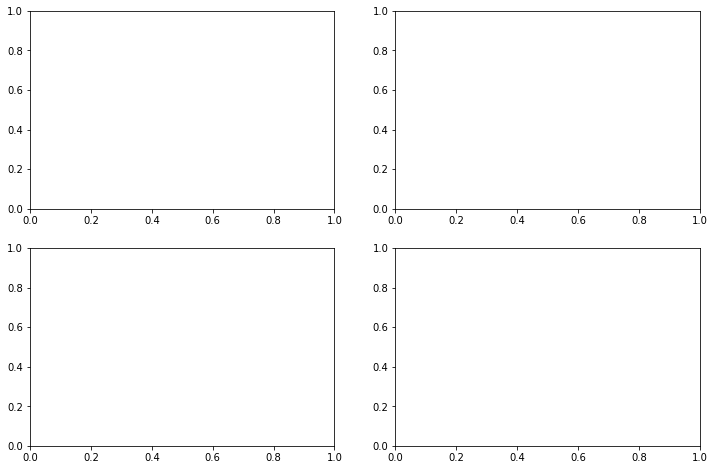

In [70]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
data = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(data):
    x, y = dataset
    x = StandardScaler().fit_transform(x)
    ax_i = ax[i_dataset / 2][i_dataset % 2]
    ax_i.scatter(x[:, 0], x[:, 1])
    ax_i.set_xlim(-2, 2)
    ax_i.set_ylim(-2, 2)
    ax_i.set_xlabel("x1 (feature)")
    ax_i.set_ylabel("x2 (feature)")

plt.show()
fig.savefig("pics/unsupervised.pdf") 

С подкреплением - реакция на обратную связь для максимизации выгоды

# С учителем - регрессия

In [71]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
df = pd.DataFrame(np.hstack([x, y]), columns=['x', 'y'])
df.head()

,x,y
0,1.412139,8.775606
1,1.143537,8.449872
2,0.902653,4.840910
3,1.034546,5.823625
4,1.833628,9.336570


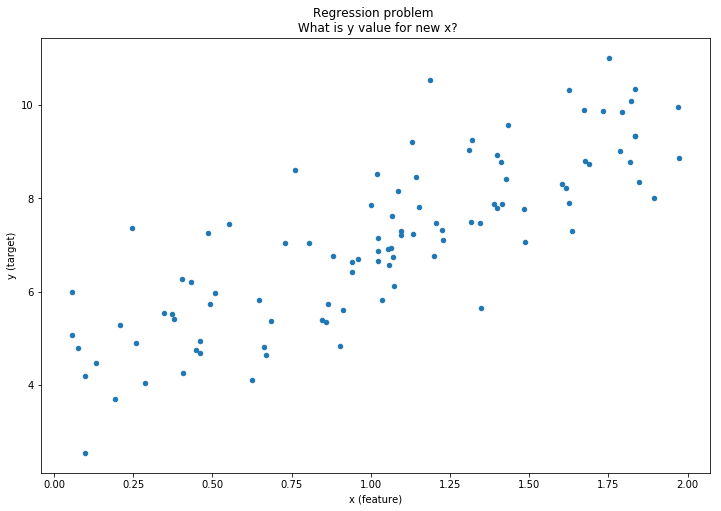

In [72]:
df.plot.scatter('x', 'y')
plt.title("Regression problem \n What is y value for new x?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.savefig('pics/regression.pdf')

## Парная регрессия

### Описание данных
$$ y = \beta_0 + \beta_1 x + \epsilon $$

### Предсказание 
$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1} x $$

Построим случайную прямую. Насколько хорошо она описывает данные?

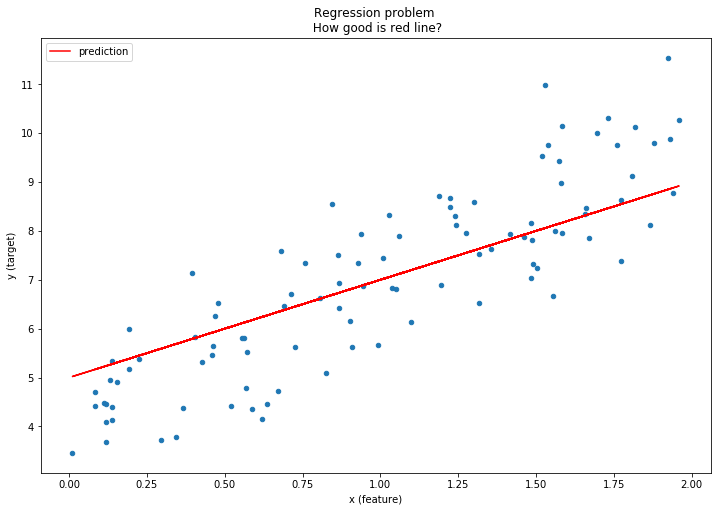

In [9]:
def predict(x):
    return 2 * x + 5

df.plot.scatter('x', 'y')
plt.title("Regression problem \n How good is red line?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x, predict(x), color='red', label='prediction')
plt.legend()
plt.savefig('pics/regression_random_line.pdf')

## RSS
Residual Sum of Squares

$$ RSS = \mathcal{L}(y, \hat{y}) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \rightarrow min$$

Метод наименьших квадратов.
Эта метрика была выбрана как функция, которую легко было минимизировать.  
После было доказано (теорема Гаусса Маркова), что она дает оптимальное решение (при определенных условиях, накладываемых на данные).  
Более подробно об этом можно узнать, например, в курсе "Эконометрика".


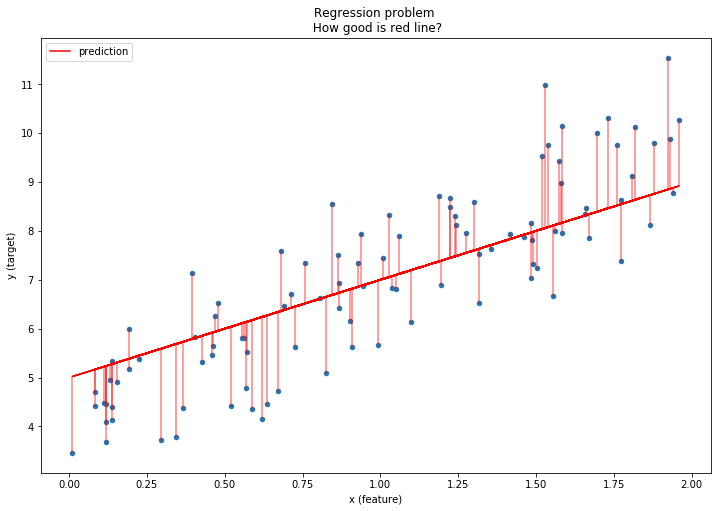

In [10]:
y_pred = predict(x)

df.plot.scatter('x', 'y')
plt.title("Regression problem \n How good is red line?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x, y_pred, color='red', label='prediction')
plt.legend()

for x_i, y_i, y_i_pred in zip(x, y, y_pred):
    plt.plot([x_i, x_i], [y_i_pred, y_i], color='red', alpha=0.5)

plt.savefig('pics/regression_random_line_mse.pdf')

In [44]:
rss = ((y - y_pred) ** 2).sum()
print(rss)

print(mean_squared_error(y, y_pred) * y.size)

559.6760201730442
559.6760201730442


## Минимизация - $\beta_0$

$$ RSS = \mathcal{L}(y, \hat{y}) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \rightarrow min$$

$$  \frac{d\mathcal{L}}{d\beta_0} =  
\frac{d}{d\beta_0}(\sum_{i=1}^{n}(y_i - \hat{y}_i)^2) = 
\frac{d}{d\beta_0}(\sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}x_i) ^ 2) =  
-2\sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}x_i) = 0$$



$$ -\sum_{i=1}^{n}y_i +\sum_{i=1}^{n} \hat{\beta_0} +\sum_{i=1}^{n} \hat{\beta_1}x_i = 0$$

$$ n\hat{\beta}_0 = \sum_{i=1}^{n}y_i - \sum_{i=1}^{n} \hat{\beta_1}x_i $$

$$ \hat{\beta}_0 = \frac{ \sum_{i=1}^{n}y_i}{n} - \frac{\sum_{i=1}^{n} \hat{\beta_1}x_i}{n} $$

### Замечание

$$\overline{y} = \frac{ \sum_{i=1}^{n}y_i}{n}$$

$$\overline{x} = \frac{ \sum_{i=1}^{n}x_i}{n}$$

### Поэтому 

$$ \hat{\beta}_0 = \overline{y} - \hat{\beta_1}\overline{x} $$

## Минимизация - $\beta_1$

$$ RSS = \mathcal{L}(y, \hat{y}) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \rightarrow min$$

$$  \frac{d\mathcal{L}}{d\beta_1} =  
\frac{d}{d\beta_1}(\sum_{i=1}^{n}(y_i - \hat{y}_i)^2) = 
\frac{d}{d\beta_1}(\sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}x_i) ^ 2) =  
-2\sum_{i=1}^{n}x_i(y_i - \hat{\beta_0} - \hat{\beta_1}x_i) = 0$$


### Подставим $\beta_0$

$$-2\sum_{i=1}^{n}x_i(y_i - \hat{\beta_0} - \hat{\beta_1}x_i) = 0$$

$$ \sum_{i=1}^{n}(x_iy_i - x_i\overline{y} + x_i\hat{\beta_1}\overline{x} - x_i\hat{\beta_1}x_i) = 0$$

$$ \sum_{i=1}^{n}((x_i y_i - x_i\overline{y}) + \hat{\beta_1}(x_i\overline{x} - x_i^2)) = 0$$

$$ \sum_{i=1}^{n}(x_iy_i - x_i\overline{y}) + \sum_{i=1}^{n}\hat{\beta_1}(x_i\overline{x} - x_i^2) = 0$$

$$ \hat{\beta_1}\sum_{i=1}^{n}(x_i^2 - x_i\overline{x}) = \sum_{i=1}^{n}(x_iy_i - x_i\overline{y}) $$

$$ \hat{\beta_1} = \frac{ \sum_{i=1}^{n}(x_iy_i - x_i\overline{y})}{\sum_{i=1}^{n}(x_i^2 - x_i\overline{x})} =
\frac{\sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n} x_i\overline{y}}{\sum_{i=1}^{n}x_i^2 - \sum_{i=1}^{n}x_i\overline{x}}$$

### Замечания

$$ n\overline{x}\overline{y} = \sum_{i=1}^{n}x_i\overline{y} = \sum_{i=1}^{n}y_i\overline{x} = \sum_{i=1}^{n}\overline{y}\overline{x}  $$

$$\sum_{i=1}^{n}x_i\overline{x} = \frac{n\overline{x}\sum_{i=1}^{n}x_i}{n} = n\overline{x}^2$$

### Поэтому

Числитель

$$ \sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n} x_i\overline{y} = \sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n} x_i\overline{y} + n\overline{x}\overline{y} - n\overline{x}\overline{y} =
\sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n} x_i\overline{y} + \sum_{i=1}^{n}\overline{x}\overline{y} - \sum_{i=1}^{n}\overline{x}y_i = 
\sum_{i=1}^{n} (x_iy_i - x_i\overline{y} + \overline{x}\overline{y} - \overline{x}y_i) =
\sum_{i=1}^{n}((x_i - \overline{x}) (y_i - \overline{y}))
$$

Знаменатель

$$\sum_{i=1}^{n}x_i^2 - \sum_{i=1}^{n}x_i\overline{x} = 
\sum_{i=1}^{n}(x_i^2 - x_i\overline{x}) =
\sum_{i=1}^{n}(x_i^2 - x_i\overline{x} - x_i\overline{x} + x_i\overline{x}) =
\sum_{i=1}^{n}(x_i^2 - 2x_i\overline{x} + x_i\overline{x}) = 
\sum_{i=1}^{n}(x_i^2 - 2x_i\overline{x} + \overline{x}^2) = 
\sum_{i=1}^{n}(x_i - \overline{x})^2
$$

## В итоге

$$ \hat{\beta}_0 = \overline{y} - \hat{\beta_1}\overline{x} $$

$$ \hat{\beta_1} = \frac{\sum_{i=1}^{n}((x_i - \overline{x}) (y_i - \overline{y}))}{\sum_{i=1}^{n}(x_i - \overline{x})^2} $$

In [73]:
def estimate(x, y):
    y_av = y.mean()
    x_av = x.mean()
    
    b1 = ((x - x_av) * (y - y_av)).sum() / ((x - x_av) ** 2).sum()
    b0 = y_av - b1 * x_av
    
    return b0, b1

def predict_estimated(x, b0, b1):
    return b0 + x * b1

In [74]:
b0, b1 = estimate(x, y)

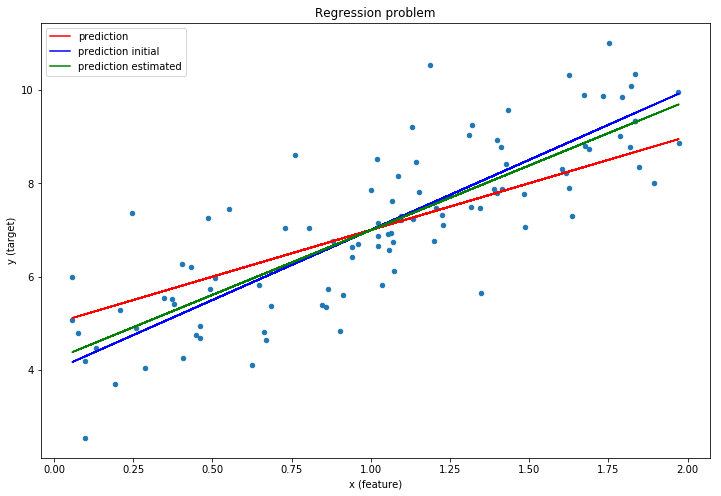

In [75]:
df.plot.scatter('x', 'y')
plt.title("Regression problem")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x, predict(x), color='red', label='prediction')
plt.plot(x, predict_estimated(x, 4, 3), color='blue', label='prediction initial')
plt.plot(x, predict_estimated(x, b0, b1), color='green', label='prediction estimated')
plt.legend()
plt.savefig('pics/regression_estimated.pdf')

In [76]:
print("estimated values: b0 = {}, b1 = {}".format(b0, b1))
print ("initial values: b0 = 4, b1 = 3")

estimated values: b0 = 4.225606439710708, b1 = 2.7696587748092245
initial values: b0 = 4, b1 = 3


In [77]:
import numpy as np
x_dummy = np.hstack([x, np.ones(x.shape[0]).reshape(-1, 1)])
m, c = np.linalg.lstsq(x_dummy, y)[0]
print(m, c)

[2.76965877] [4.22560644]


/Users/nazhmeddinbabakhanov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


## Множественная регрессия

### Предсказание 
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_p x_p $$

<IPython.core.display.Javascript object>


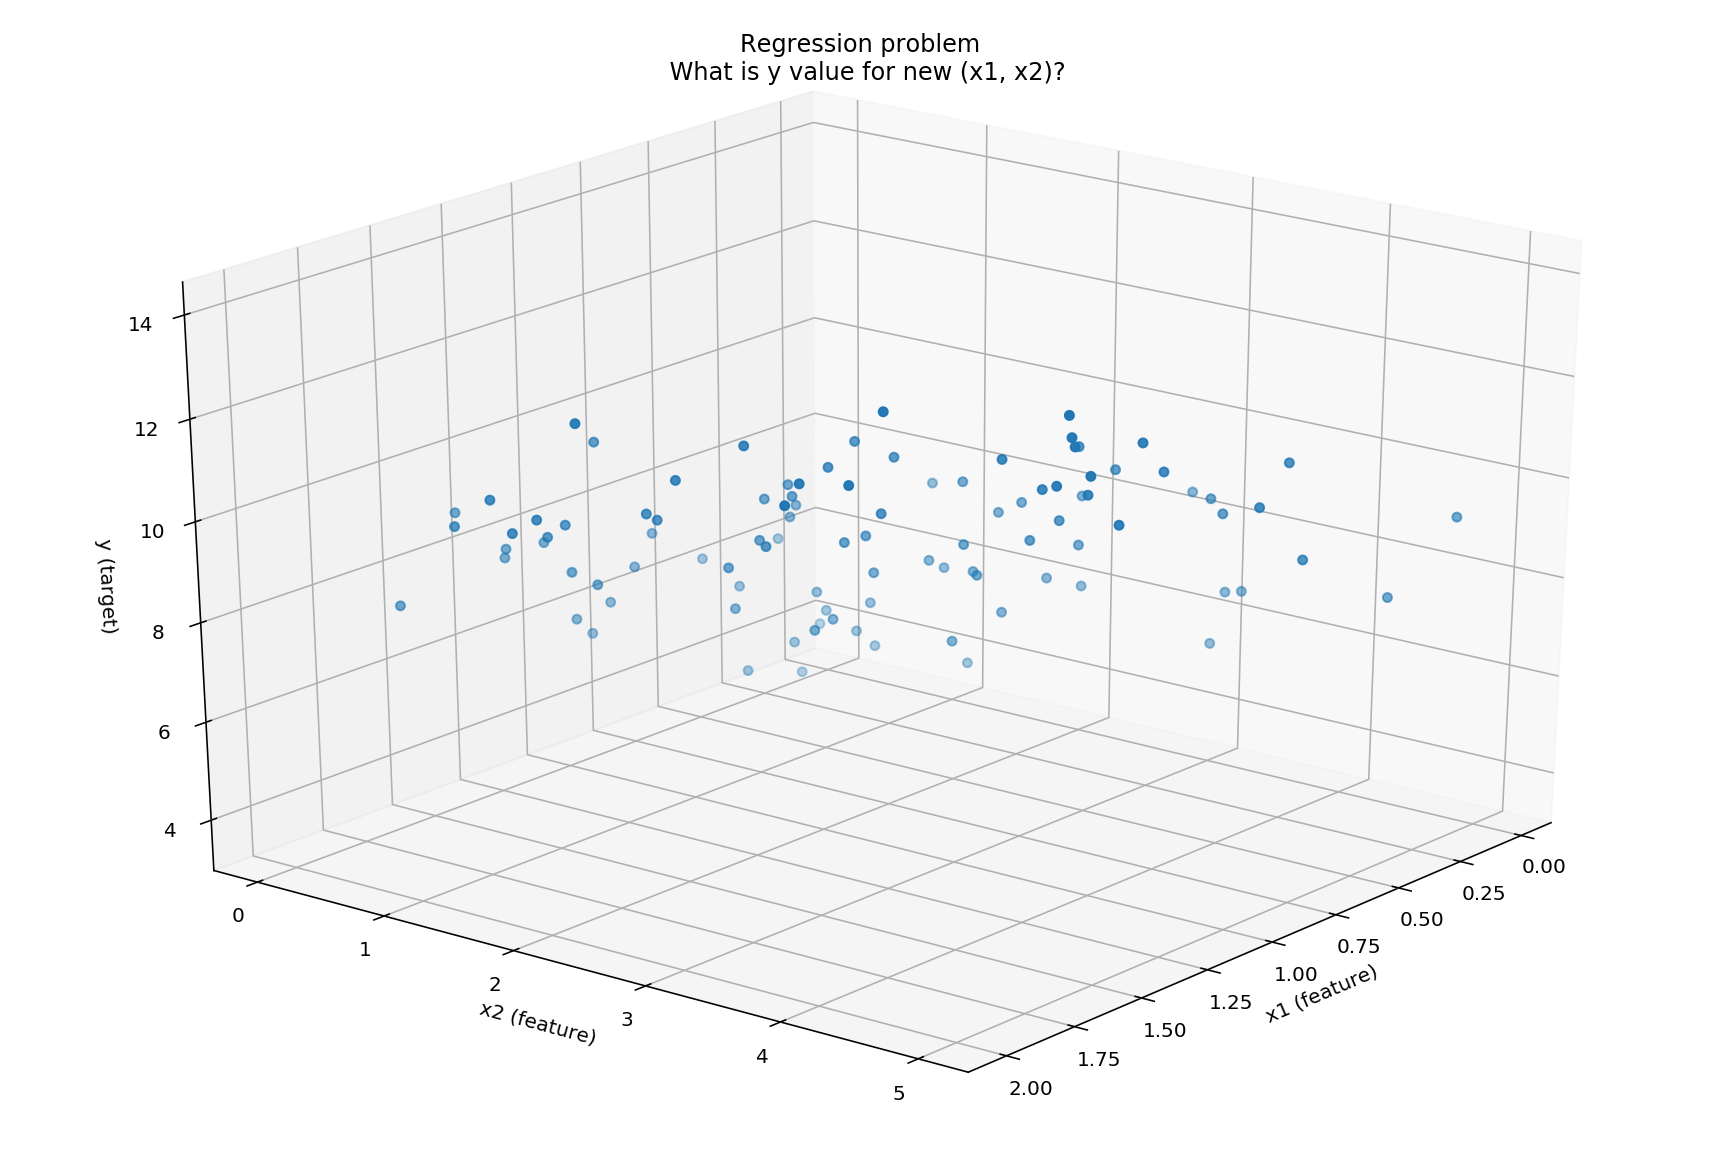

In [81]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = [12, 8]
fig=plt.figure()
ax = Axes3D(fig)

x1 = 2 * np.random.rand(100, 1)
x2 = 5 * np.random.rand(100, 1)

# y = 4 + 3*x_1 + 1*x_2
y = 4 + 3 * x1 + x2 + np.random.randn(100, 1)

ax.scatter(x1, x2, y, marker='o')
ax.set_title("Regression problem \n What is y value for new (x1, x2)?")
ax.set_xlabel("x1 (feature)")
ax.set_ylabel("x2 (feature)")
ax.set_zlabel("y (target)")
plt.savefig('pics/regression_3d.pdf')
plt.show()

## Матричная форма 

Введем $x_0$ - векктор единиц:

$$ x = \begin{bmatrix} 1 & x_{11} & ... & x_{p1} \\ 1 & x_{12} & ... & x_{p2} \\ ... & ... & ... & ... \\ 1 & x_{n1} & ... & x_{n1}
\end{bmatrix} \quad 
\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ ... \\ \theta_p \end{bmatrix} \quad 
y = \begin{bmatrix} y_1 \\ y_2 \\ ... \\ y_n \end{bmatrix} $$

$$x\theta = y$$

$$x_{n\cdot p}\cdot\theta_{p\cdot 1} = y_{n\cdot 1} $$


$$ RSS = \mathcal{L}(y, \hat{y}) = \sum_{i=1}^n (y_i - x_i^T\theta)^2 = \\= 
(y_1 - x_1^T\theta)^2 + (y_2 - x_2^T\theta)^2 + ... + (y_n - x_n^T\theta)^2 = \\
=[y_1 - x_1^T\theta, y_2 - x_2^T\theta, ..., y_n - x_n^T\theta]
\begin{bmatrix} y_1 - x_1^T\theta \\ y_2 - x_2^T\theta \\ ... \\ y_n - x_n^T\theta \end{bmatrix} = \\
= (y-x\theta)^T(y-x\theta)
$$

### Производная по матрице

http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf  
http://nabatchikov.com/blog/view/matrix_der

Здесь под производной скалярной функции $f(x)$ по вектору x понимается градиент
$$ \frac{df(x)}{dx} = [ \frac{df(x)}{dx_1}, . . . , \frac{df(x)}{dx_d}]^T $$

Свойства, которые понадобятся далее:

$$\frac{dx^TA}{dx} = \frac{dA^Tx}{dx} = A$$

$$\frac{dx^TAx}{dx} = 2Ax$$

Приравниваем производную к нулю

$$\frac{d\mathcal{L}}{d\theta} = \frac{d}{d\theta} (y-x\theta)^T(y-x\theta) = \\
= \frac{d}{d\theta} (y^T-(x\theta)^T)(y-x\theta) = \\ 
= \frac{d}{d\theta}( (y^T-(x\theta)^T)y - (y^T-(x\theta)^T)(x\theta)) = \\ 
= \frac{d}{d\theta}(y^Ty-(x\theta)^Ty - y^Tx\theta + (x\theta)^Tx\theta) = \\ 
= \frac{d}{d\theta}(y^Ty-\theta^Tx^Ty - y^Tx\theta + \theta^Tx^Tx\theta) = \\ 
= \frac{d}{d\theta}(y^Ty)-\frac{d}{d\theta}(\theta^T(x^Ty)) - \frac{d}{d\theta}((y^Tx)\theta) + \frac{d}{d\theta}(\theta^T(x^Tx)\theta) = \\ 
= 0-x^Ty - x^Ty + 2x^Tx\theta = -2x^Ty + 2x^Tx\theta = 0\\ 
$$

$$x^Tx\theta=x^Ty$$
$$(x^Tx)^{-1}x^Tx\theta=(x^Tx)^{-1}x^Ty$$
$$\theta=(x^Tx)^{-1}x^Ty$$

In [55]:
x = np.hstack([np.ones(x1.shape[0]).reshape(-1, 1), x1, x2])

w = la.inv(x.T.dot(x)).dot(x.T).dot(y) 
print(w)

[[3.63122597]
 [3.05570113]
 [1.05697589]]


In [56]:
def predict_estimated(x, w):
    return x.dot(w)

def plane(x1, x2):
    return 4 + x1 * 3 + x2

<IPython.core.display.Javascript object>


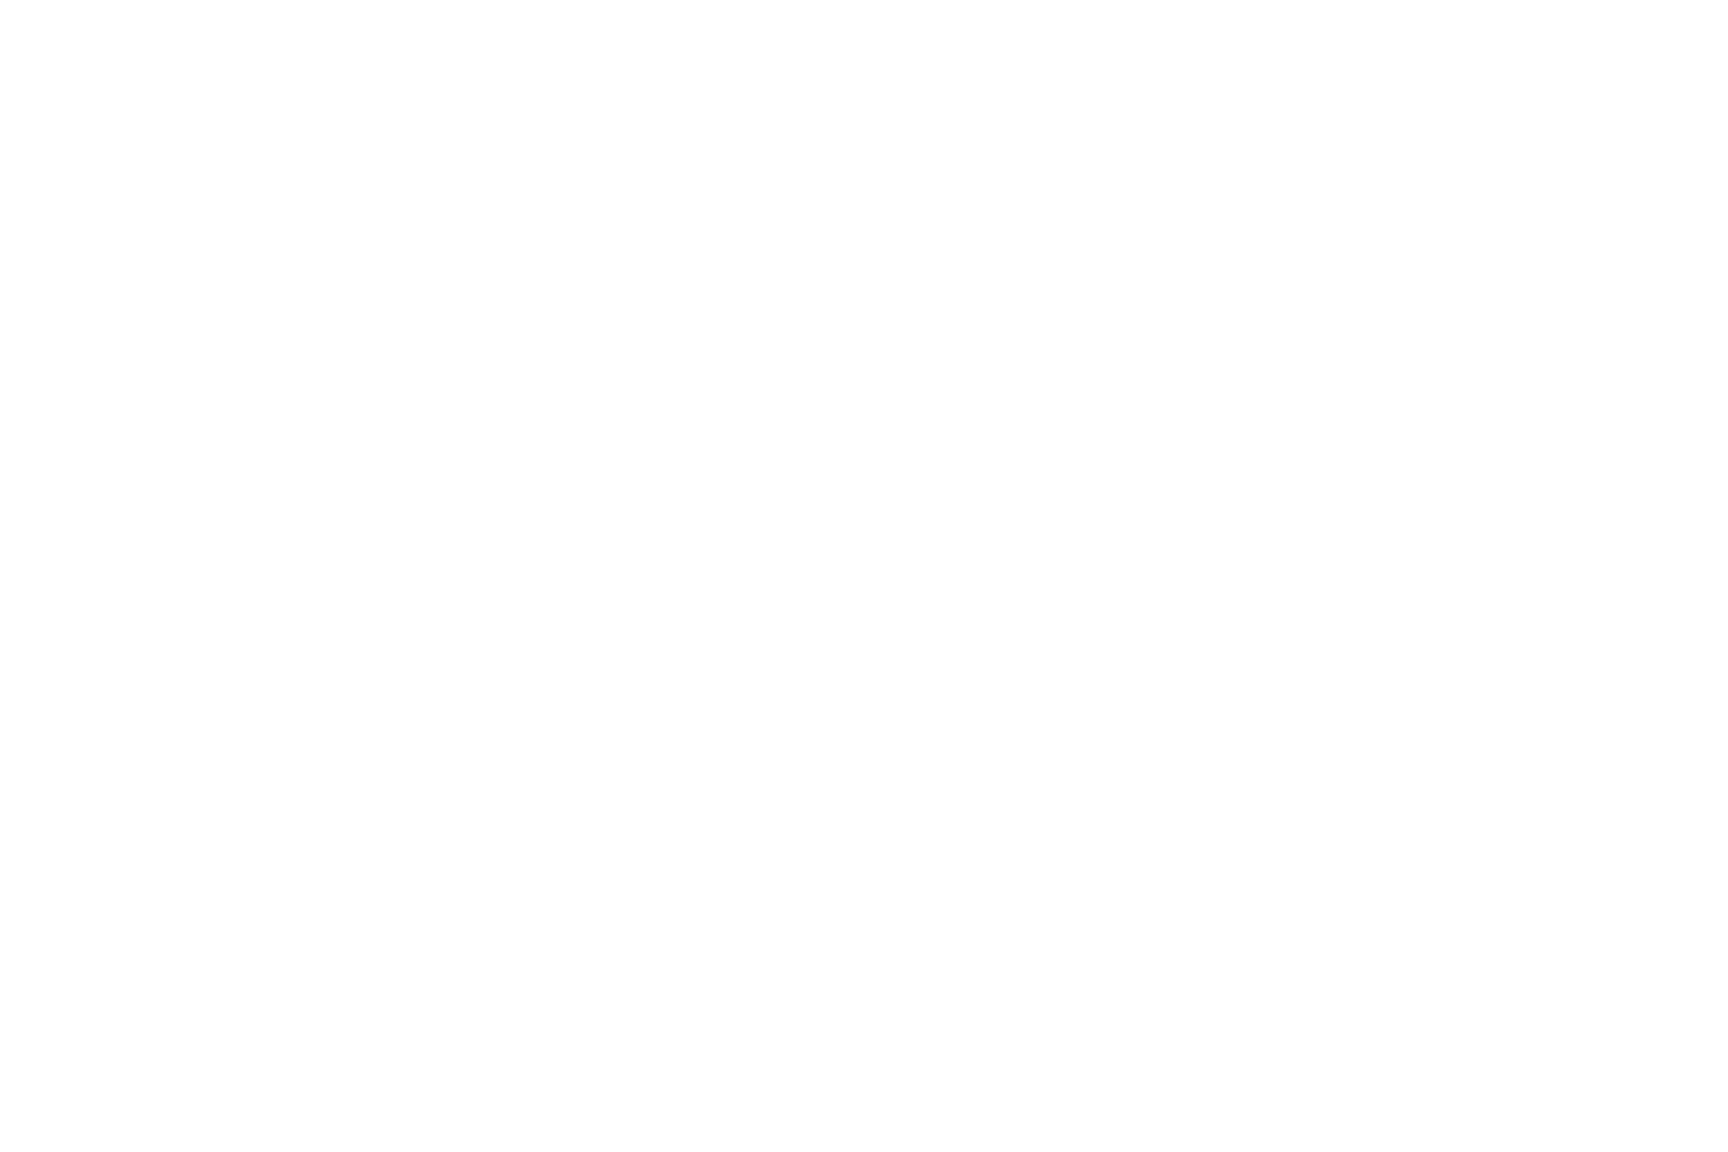

<IPython.core.display.Javascript object>


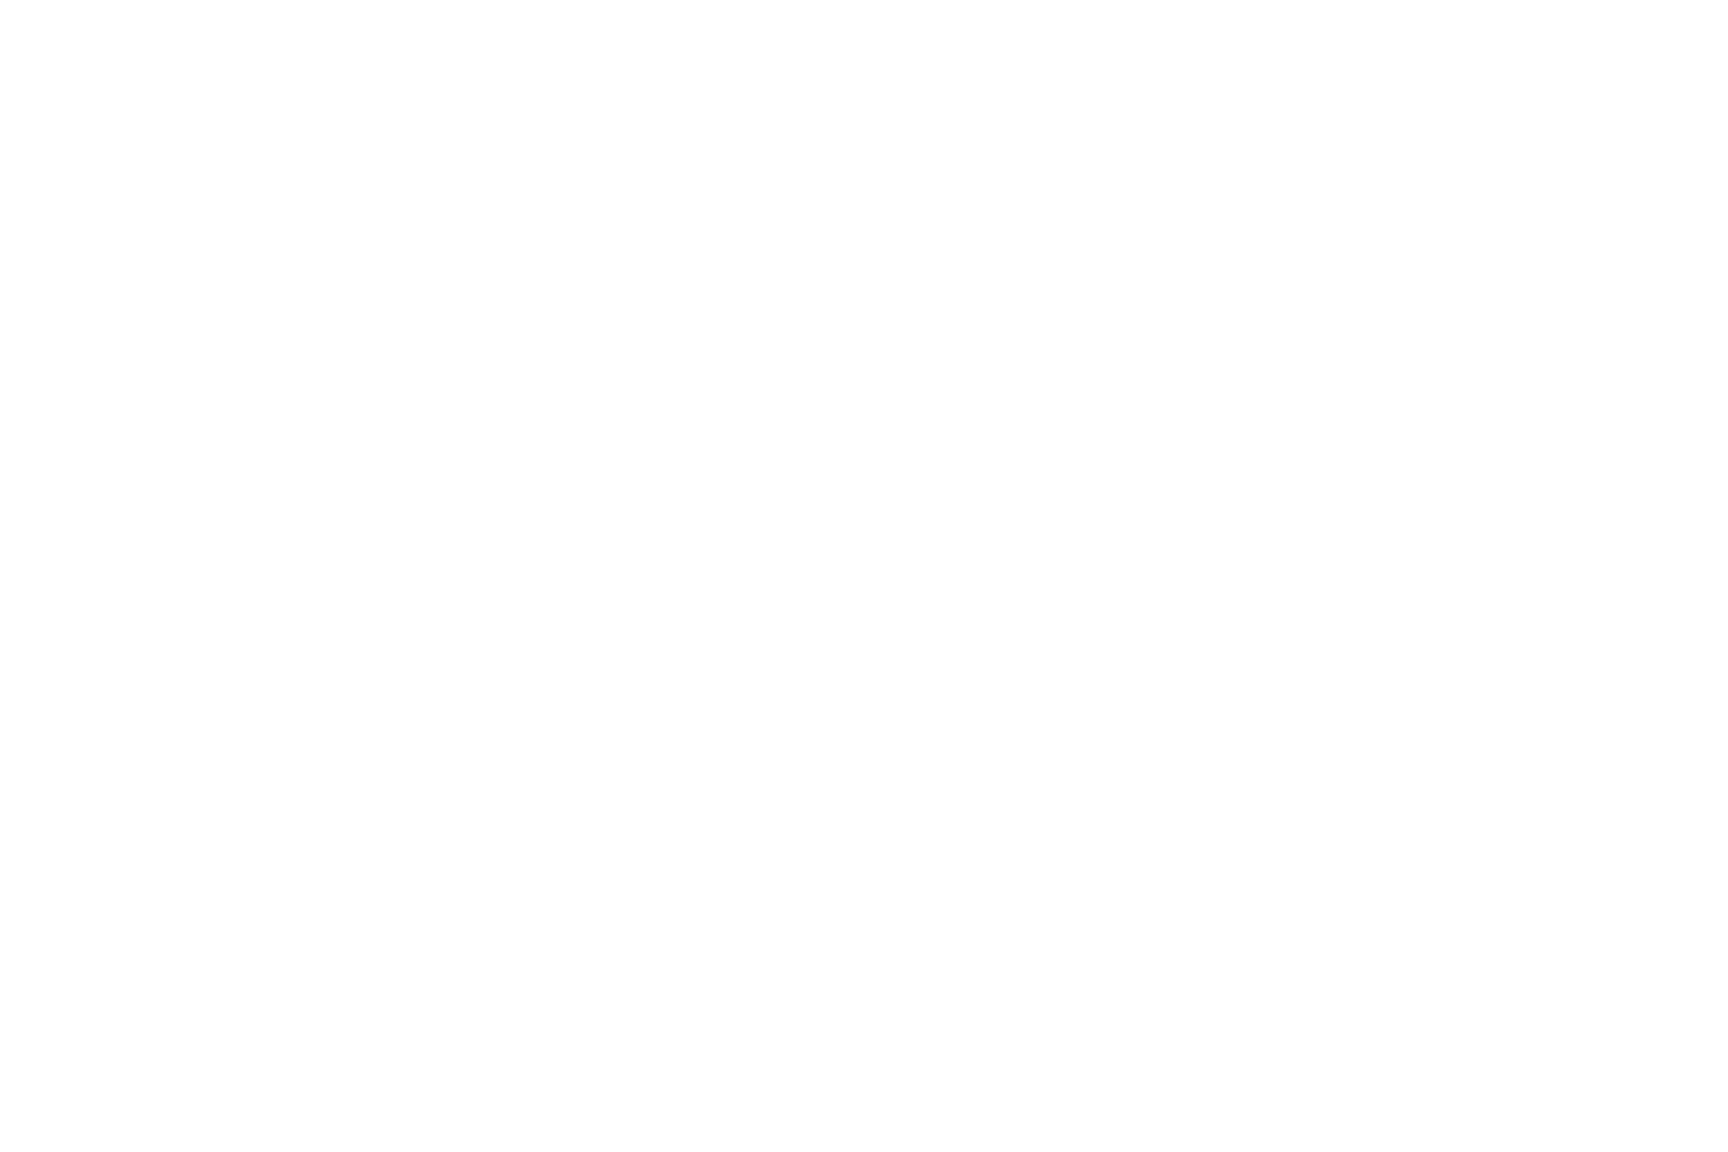

In [57]:
%matplotlib notebook
fig=plt.figure()
ax = Axes3D(fig)

x1_surfs = np.arange(0, 2.5, 0.5)
x2_surfs = np.arange(0, 5.0, 1)
x1_surf, x2_surf = np.meshgrid(x1_surfs, x2_surfs)

zs = np.array([plane(x_i, y_i) for x_i, y_i in zip(np.ravel(x1_surf), np.ravel(x2_surf))])
z = zs.reshape(x1_surf.shape)
ax.plot_surface(x1_surf, x2_surf, z, alpha=0.2)

zs_pred = np.array([predict_estimated(np.array([[1, x_i, y_i]]), w) for x_i, y_i in zip(np.ravel(x1_surf), np.ravel(x2_surf))])
z_predicted = zs_pred.reshape(x1_surf.shape)
ax.plot_surface(x1_surf, x2_surf, z_predicted, alpha=0.2, color='red')
ax.scatter(x1, x2, y, marker='o')

ax.set_title("Regression problem \n What is y value for new (x1, x2)?")
ax.set_xlabel("x1 (feature)")
ax.set_ylabel("x2 (feature)")
ax.set_zlabel("y (target)")
plt.savefig('pics/regression_3d_estimated.pdf')

plt.show()


In [58]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(np.hstack([x1, x2]), y)
print(lin_reg.intercept_, lin_reg.coef_)
y_pred = lin_reg.predict(np.hstack([x1, x2]))
print(np.hstack([y_pred, y])[:10])
print(mean_squared_error(y_pred, y))

[3.63122597] [[3.05570113 1.05697589]]
[[ 6.99166147  6.79510813]
 [12.08492842 12.5741706 ]
 [10.26955679  9.8244352 ]
 [ 9.7398485  10.26549948]
 [ 8.02509623  6.40769075]
 [ 9.92438017 10.60034981]
 [ 6.24472136  5.68831682]
 [11.04195316 11.38537123]
 [ 9.06633837 10.03602567]
 [ 8.66895773  7.43114524]]
0.8829092802156622


## Вычислительная сложность 

Вычисляется матрица $(x^Tx)^{-1}$ размера $p \times p$, где $p$ - количество признаков (feature). 
Вычислитальная сложность обратной матрицы обычно от $O(n^{2.4})$ до $O(n^3)$

При удвоении количества признаков время на вычисления нужно умножить на от $2^{2.4} = 5.3$ до $2^3 = 8$.

Рассчет становится очень медленным, когда количество признаков очень большое - например, 100,000

При этом рассчет линеен по отношению к количеству элементов выборки ($O(n)$). Т.о. можно эффективно обрабатывать большие наборы данных, если они помещаются в оперативную память.

При этом предсказание очень быстрое и зависит только от количества объектов, по которым необходимо рассчитать значение.

# Полиномиальная регрессия


In [59]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [60]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

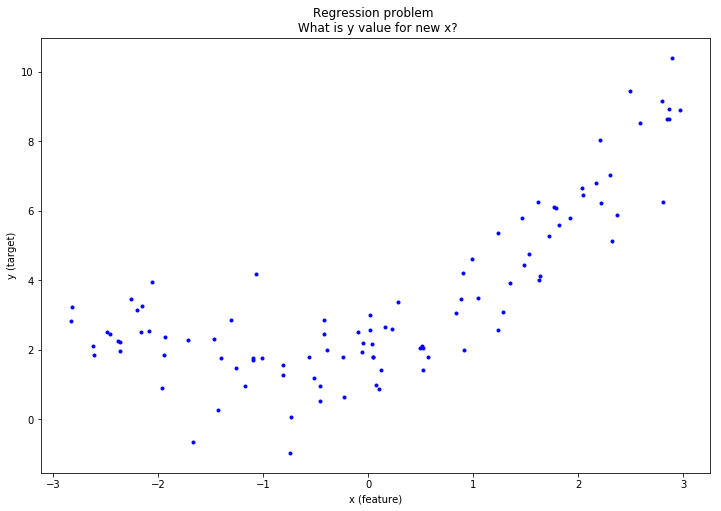

In [61]:
plt.plot(X, y, "b.")
plt.title("Regression problem \n What is y value for new x?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.savefig('pics/regression_poly.pdf')

Расширим пространство гипотез до всех полиномов степени $p$. 

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_p x_p + \theta_{12} x_1^2 + \theta_{22} x_1x_2 + ... + \theta_{p2} x_1x_p + ... + \theta_{pp} x_p^2 + ... $$

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.52544691])

In [63]:
X_poly[0]

array([0.52544691, 0.27609446])

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2$$

In [64]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.93901876]), array([[0.99109677, 0.51148807]]))

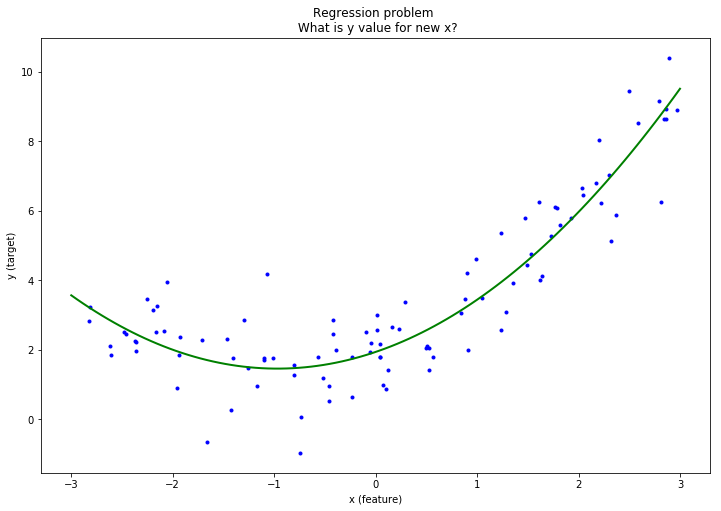

In [65]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "g-", linewidth=2, label="Predictions")
plt.title("Regression problem \n What is y value for new x?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.savefig('pics/regression_poly_predicted.pdf')

## Проблема переобучения

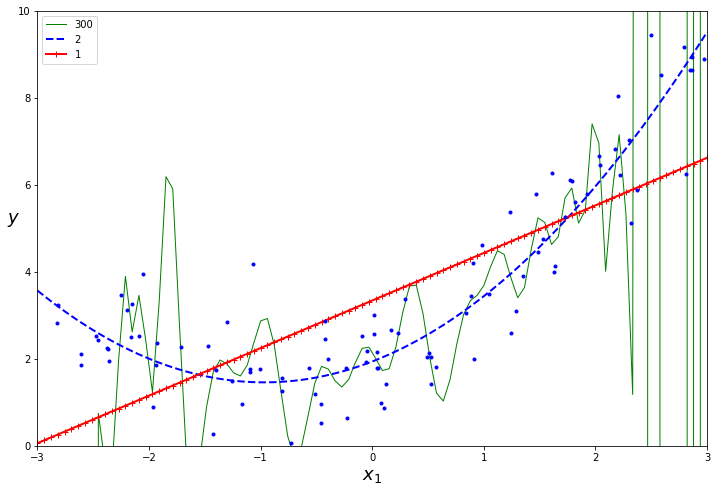

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig('pics/regression_poly_overfit.pdf')
plt.show()

## Регуляризация

$$ RSS = \mathcal{L}(y, \theta, x) = \sum_{i=1}^{n}(y_i - x_i^T\theta)^2 + \alpha R(\theta) \rightarrow min $$

## Гребневая регрессия (Ridge regression, регуляризация Тихонова, $L^2$-регуляризация)




$$ RSS = \mathcal{L}(y, \theta, x) = \sum_{i=1}^{n}(y_i - x_i^T\theta)^2 + \alpha \sum_{i=1}^{n} \theta_i^2 \rightarrow min $$

### Замечание 
$\theta_0$ не участвует в регрессии, так как нужна возможность провести гиперплоскость с любым сдвигом.

Снова будем использовать свойство

$$\frac{dx^TAx}{dx} = 2Ax$$

$$\frac{d\mathcal{L}}{d\theta} = \frac{d}{d\theta} (y-x\theta)^T(y-x\theta) +  \frac{d}{d\theta} \alpha\theta^T\theta = \\
= -2x^Ty + 2x^Tx\theta + 2\alpha \theta = 0$$

$$ x^Tx\theta + \alpha \theta = x^Ty $$
$$ (x^Tx + \alpha E) \theta = x^Ty $$

$E$ - единичная диагональная матрица

$$ (x^Tx + \alpha E)^{-1} (x^Tx + \alpha E)\theta = (x^Tx + \alpha E)^{-1} x^Ty $$

$$ \theta = (x^Tx + \alpha E)^{-1} x^Ty $$

In [67]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.97697943]])

### Замечание

Гребнем является диагональная матрица, которую мы прибавляем к матрице $X^TX$ с линейнозависимыми колонками, в результате получаемая матрица не сингулярна (не имеет линейно зависимых строк и столбцов).

## Лассо регрессия (Least Absolute Shrinkage and Selection Operator Regression, Lasso regression, $L^1$-регуляризация)

$$ RSS = \mathcal{L}(y, \theta, x) = \sum_{i=1}^{n}(y_i - x_i^T\theta)^2 + \alpha \sum_{i=1}^{n} |\theta_i| \rightarrow min $$

Сумма модулей весов

### Замечание

$$|x|' = \frac{x}{|x|} = sign(x)$$


$$ \frac {d\mathcal{L}}{d\theta_i} = 2 \sum_{i=1}^{n} ((y_i - x_i^T\theta)x_i) + \alpha sign(\theta_i)
$$

Такая задача не имеет решения в явном виде, для ее решения будем использовать градиентный спуск.
Важно делать нормализацию признаков.

### Замечание 
Важная характеристика Лассо регрессии - устранение наименее важных признаков (обнуление их весов).
Происходит автоматический выбор признаков и получается разреженная модель (несколько ненулевых весов)

## Elastic Net

$$ RSS = \mathcal{L}(y, \theta, x) = \sum_{i=1}^{n}(y_i - x_i^T\theta)^2 +r \alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_i^2 \rightarrow min $$

Всегда следует делать регуляризацию. То есть следует избегать обычной линейной регрессии. 
Если есть знание, что часть признаков не важны, то используется Lasso или Elastic Net. 
Если признаки скоррелированы или количество признаков больше количества примеров, то лучше использовать Elastic Net или Ridge. 

https://habrahabr.ru/company/ods/blog/322076/  
Aurélien Géron - Hands-on Machine Learning with Scikit-Learn and TensorFlow